# Exchange Phase

So far, it appears that the exchange phase is the only one which is not faithfully reproduced. In this notebook I will add first the earth's magnetic field and then gravity to the simulations in the hope of being able to reproduce the directional exchange of the experimentally observed exchange phase. 

In [1]:
import lammps2d as lmp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anm
import matplotlib.collections as clt
import pandas as pd
import string as st
import scipy.spatial as spp
import scipy.optimize as spo
import sympy as smp
import copy as cp
import pickle

from IPython.display import HTML

smp.init_printing()
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In phase space, I will explore the Synchronous-Exchange region:

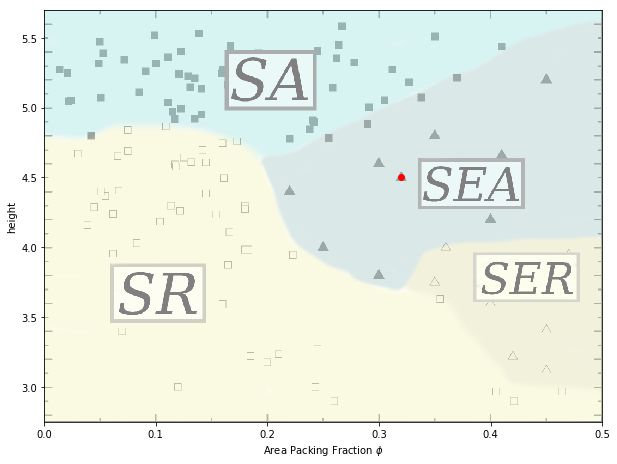

In [7]:
packing = [0.32]
height = [4.5]

ax = lmp.draw_exp_phase_diagram()
ax.plot(packing,height,marker='o',color='r',linestyle='none')

In [29]:
idx = pd.IndexSlice
radius = 1.4 #um
frequency = np.linspace(np.sqrt(0.1),np.sqrt(100),20)**2 #Hz
angle = 27 #degrees

region, initial_positions = lmp.initial_setup(n_of_particles = 150, packing=packing[0], height = height[0])
median_dimer_lifetime = np.empty(np.shape(frequency))

simulation_array = []

for i,f in enumerate(frequency):

    if i>0:
        last_frame = trj.index.get_level_values('frame').unique()[-1]
        initial_positions = trj.loc[idx[last_frame,:]].filter(["x","y","z"]).values

    sim = lmp.sim(initial_positions,
              magnitude = 7.28,
              file_name = "frequency_f_%g"%f,
              dir_name = "C:/Users/aortiza/Desktop/ExchangePhase/no_earth_no_gravity",
              radius = radius,
              diffusion = 0.073,
              frequency=f,
              susceptibility = 0.4,
              angle=angle,
              framerate=3e1,
              timestep=1e-4,
              total_time = 10,
              temperature = 300,
              stamp_time = False,
              space = {'region':region,'boundary':['p','p','f'],'walls':[False,False,True]})

    sim.generate_scripts()
    sim.run()
    simulation_array.append(sim)
    
    trj = sim.load(read_trj = True)
    dim = lmp.dimers(trj,sim,distance=3.5)
    
    if dim.empty:
        median_dimer_lifetime[i] = 0
    else: 
        median_dimer_lifetime[i] = dim.groupby('id').size().median()/sim.run_parameters.framerate

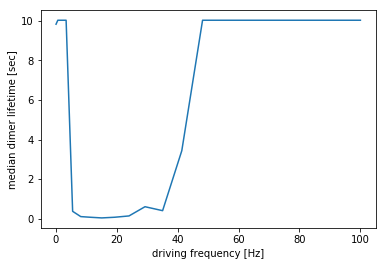

In [30]:
plt.plot(frequency,median_dimer_lifetime)
plt.xlabel("driving frequency [Hz]")
plt.ylabel("median dimer lifetime [sec]")

In [31]:
def show_sim(f_id,sim_list,max_time=5):
    print(frequency[f_id])
    trj = sim_list[f_id].load(read_trj = True)
    frames = trj.index.get_level_values('frame').unique().values
    idx = pd.IndexSlice
    frame_limit = max_time/sim_list[f_id].run_parameters.timestep
    return lmp.display_animation_direct(sim_list[f_id],trj.loc[idx[frames[frames<frame_limit],:]])

In [32]:
HTML(show_sim(4,simulation_array,5))

5.54563246321


In [34]:
HTML(show_sim(6,simulation_array,3))

11.3856379917


In [28]:
HTML(show_sim(10,simulation_array,3))

29.3000276422


In [69]:
region, initial_positions = lmp.initial_setup(n_of_particles = 150, packing=0.45, height = 3.4)

sim = lmp.sim(initial_positions,
          magnitude = 7.28,
          file_name = "frequency_f_%g"%f,
          dir_name = "C:/Users/aortiza/Desktop/ExchangePhase/boundary",
          radius = radius,
          diffusion = 0.073,
          frequency=1,
          susceptibility = 0.4,
          angle=angle,
          framerate=3e1,
          timestep=1e-4,
          total_time = 10,
          temperature = 300,
          stamp_time = False,
          space = {'region':region,'boundary':['p','f','f'],'walls':[False,True,True]})

sim.generate_scripts()
sim.run()

In [43]:
max_time=10
trj = sim.load(read_trj = True)
frames = trj.index.get_level_values('frame').unique().values
idx = pd.IndexSlice
frame_limit = max_time/sim.run_parameters.timestep
HTML(lmp.display_animation_direct(sim,trj.loc[idx[frames[frames<frame_limit],:]]))

In [122]:
HTML(lmp.display_animation_direct(sim,trj,start=3,end=6,step=1))